# Test agents

In [1]:
import sys

sys.path.insert(1, '../src')
import agents as ag
import random_agent as rand_ag
import local_agent as loc_ag
import global_agent as glob_ag
import lightbox as lb
#to not restart kernel on jupyter each time
import importlib
importlib.reload(lb)
importlib.reload(ag)
importlib.reload(rand_ag)
importlib.reload(loc_ag)
importlib.reload(glob_ag)

<module 'global_agent' from '../src/global_agent.py'>

## Creation and print

In [2]:
env = lb.LightBox()

In [236]:
age = ag.AbstractAgent(env)

In [15]:
print(age)

Abstract agent, currently at iteration 1 and learned 0 options


In [16]:
age.FMDP[1]["cpts"][2].print_tree()

2       
├── -0-> 0
└── -1-> 0


## BIC

In [60]:
importlib.reload(ag)
age = ag.AbstractAgent(env)
s0 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s1 = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

age.FMDP[1]["cpts"][1].add_datapoint(s0, 1, s1)

In [61]:
age.FMDP[1]["cpts"][1].add_datapoint(s0, 1, s1)


In [62]:
age.FMDP[1]["cpts"][1].add_datapoint(s0, 1, s0)

In [63]:
age.FMDP[1]["cpts"][1].print_tree()
print(age.FMDP[1]["cpts"][1].children[0].dataset)
print(age.FMDP[1]["cpts"][1].children[0].compute_BIC_Mono())
#should return -12.89

1       
├── -0-> 0.6666666666666666
└── -1-> 0
[{'s_0': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'a': 1, 's_1': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, {'s_0': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'a': 1, 's_1': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, {'s_0': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'a': 1, 's_1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}]
-12.895665391565537


## Refinement

In [214]:
importlib.reload(ag)
age = ag.AbstractAgent(env)
#Var 2 depend on var 1
#var 1
s_1_off = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_1_on = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#var 2
s_2_off = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_2_on = [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

print(age.FMDP[2]["cpts"][2].compute_BIC_Mono())

#1 off -> 1 off
for _ in range(10):
    age.update(s_1_off, 2, s_1_off)

#1 on -> 2 on (90% of the time)
for _ in range(9):
    age.update(s_1_on, 2, s_2_on)

#1 on -> 2 off (10%)
for _ in range(1):
    age.update(s_1_on, 2, s_1_off)
    
age.FMDP[2]["cpts"][2].print_tree()
age.FMDP[2]["cpts"][2].children[0].children[1].compute_BIC_Mono()

0
2       
├── -0-> 1
│   ├── -0-> 0.0
│   └── -1-> 0.9
└── -1-> 0


-26.276680663854943

[{'id': 1, 'level': 1, 'dependencies': [], 'state': False}, {'id': 2, 'level': 1, 'dependencies': [], 'state': False}, {'id': 3, 'level': 1, 'dependencies': [], 'state': False}, {'id': 4, 'level': 1, 'dependencies': [], 'state': False}, {'id': 5, 'level': 1, 'dependencies': [], 'state': False}, {'id': 6, 'level': 1, 'dependencies': [], 'state': False}, {'id': 7, 'level': 1, 'dependencies': [], 'state': False}, {'id': 8, 'level': 1, 'dependencies': [], 'state': False}, {'id': 9, 'level': 1, 'dependencies': [], 'state': False}, {'id': 10, 'level': 2, 'dependencies': [1, 4, 7], 'state': False}, {'id': 11, 'level': 2, 'dependencies': [2, 5], 'state': False}, {'id': 12, 'level': 2, 'dependencies': [3, 6], 'state': False}, {'id': 13, 'level': 2, 'dependencies': [2, 3], 'state': False}, {'id': 14, 'level': 2, 'dependencies': [5, 6], 'state': False}, {'id': 15, 'level': 2, 'dependencies': [7, 8, 9], 'state': False}, {'id': 16, 'level': 3, 'dependencies': [10, 11], 'state': False}, {'id': 17, '

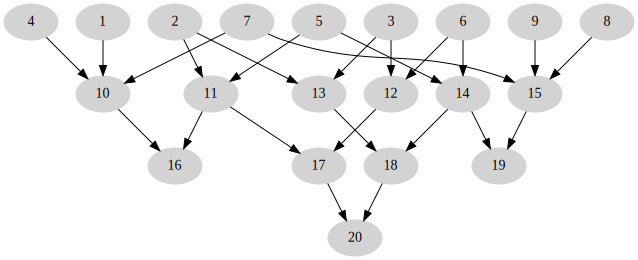

In [222]:
importlib.reload(lb)
env = lb.LightBox()
env.count_refin()
env.show()

## Options

In [65]:
importlib.reload(ag)
age = ag.AbstractAgent(env)

### Creation

In [66]:
o = age.create_option(10, 1, [1,4,7], 0.8)

TypeError: create_option() missing 1 required positional argument: 'opt_root'

In [67]:
o.print_tree()

O1 -> Off
7       
├── A1 [0]
└── O7 -> Off [1]


#### On refinement : On

In [69]:
importlib.reload(ag)
age = ag.AbstractAgent(env)
#Var 2 depend on var 1
#var 1
s_1_off = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_1_on = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#var 2
s_2_off = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_2_on = [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

print(age.FMDP[2]["cpts"][2].compute_BIC_Mono())

#1 off -> 1 off
for _ in range(10):
    age.update(s_1_off, 2, s_1_off)

#1 on -> 2 on (90% of the time)
for _ in range(9):
    age.update(s_1_on, 2, s_2_on)

#1 on -> 2 off (10%)
for _ in range(1):
    age.update(s_1_on, 2, s_1_off)
    
age.FMDP[2]["cpts"][2].print_tree()
age.FMDP[2]["cpts"][2].children[0].children[1].compute_BIC_Mono()

0
2       
├── -0-> 1
│   ├── -0-> 0.0
│   └── -1-> 0.9
└── -1-> 0


-26.276680663854943

In [70]:
for o in age.options:
    age.options[o].print_tree()

O2 -> On
1       
├── A1 [0]
└── A2 [1]


#### On refinement : Off

In [71]:
importlib.reload(ag)
age = ag.AbstractAgent(env)
#Var 2 depend on var 1
#var 1
s_1_off = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_1_off_bis = [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_1_on = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#var 2
s_2_off = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_2_on = [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

print(age.FMDP[2]["cpts"][2].compute_BIC_Mono())

#1 off -> 1 off
for _ in range(10):
    age.update(s_1_off, 2, s_1_off)
    
#1 off -> 1 off
for _ in range(10):
    age.update(s_1_off_bis, 2, s_1_off)

#1 on -> 2 on (90% of the time)
for _ in range(9):
    age.update(s_1_on, 2, s_2_on)

#1 on -> 2 off (10%)
for _ in range(1):
    age.update(s_1_on, 2, s_1_on)
    
age.FMDP[2]["cpts"][2].print_tree()
age.FMDP[2]["cpts"][2].children[0].children[1].compute_BIC_Mono()

#print(age.FMDP[2]["cpts"][4].children[0].children[1].parents_list)
#for d in age.FMDP[2]["cpts"][4].children[0].children[0].dataset:
#    print("{} ; {}".format(d["s_0"],d["s_1"]))
#print("------------------------------------------------")

#for d in age.FMDP[2]["cpts"][4].children[0].children[1].dataset:
#    print("{} ; {}".format(d["s_0"],d["s_1"]))
for o in age.options:
    print(age.options[o])

0
2       
├── -0-> 1
│   ├── -0-> 0.0
│   └── -1-> 0.9
└── -1-> 0
O2 -> On


In [72]:
age.FMDP[2]["cpts"][4].print_tree()

4       
├── -0-> 0.0
└── -1-> 0


In [85]:
for k in age.options:
    o = age.options[k]
    o.print_tree()

O2 -> On
1       
├── A1 [0]
└── A2 [1]


### Update sigma

In [88]:
print(o.sig)
o.update_sig(0)
print(o.sig)
o.update_sig(1)
print(o.sig)
o.update_sig(1)
print(o.sig)
o.update_sig(1)
print(o.sig)
o.update_sig(0)
print(o.sig)

0.6
0.5
0.5714285714285714
0.625
0.6666666666666666
0.6


### Steps

In [ ]:
st = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print(o.next_step(st))
print(o.done)

In [ ]:
st = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print(o.next_step(st))
print(o.done)

In [ ]:
st = [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print(o.next_step(st))
print(o.done)

In [ ]:
st = [1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
print(o.next_step(st))
print(o.done)

In [ ]:
print(o.step)

In [ ]:
print(age.C)
print(age.queue_for_C)

In [ ]:
age.C = [1,4,7]


In [ ]:
age.check_update_C()
print(age.C)
print(age.queue_for_C)

In [ ]:
age.options[10].print_tree()

### Options Hierarchie

In [90]:
importlib.reload(ag)
age = ag.AbstractAgent(env)

age.try_option(10, 1, [1,4,7], 1)

AttributeError: 'NoneType' object has no attribute 'used'

In [ ]:
for k in age.options:
    o = age.options[k]
    o.print_tree()

### Option creation on refinement

#### 1 -> 10

In [ ]:
importlib.reload(ag)
age = ag.AbstractAgent(env)
age.artificial_setup()
print(age.C)
#Var 2 depend on var 1
#var 1
s_1_off = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_1_on = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#var 2
s_10_off = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_10_on = [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]

print(age.FMDP[10]["cpts"][10].compute_BIC())

#1 off -> 1 off
for _ in range(12):
    age.update(s_1_off, 10, s_1_off)

#1 on -> 2 on (90% of the time)
for _ in range(9):
    age.update(s_1_on, 10, s_10_on)

#1 on -> 2 off (10%)
for _ in range(1):
    age.update(s_1_on, 10, s_1_on)
print(age.C)

In [ ]:
print(age.options)
age.options[10].print_tree()

In [ ]:
for i_dbn in [10]:
    print("-------MDP {} --------".format(i_dbn))
    for i_cpt in age.FMDP[i_dbn]["cpts"]:
        print("---CPT {}---".format(i_cpt))
        age.FMDP[i_dbn]["cpts"][i_cpt].print_tree()

#### 1-> 1

In [ ]:
importlib.reload(ag)
age = ag.AbstractAgent(env)
age.artificial_setup()
import numpy as np
for i in range(100):
    s1 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    tmp = np.random.randint(10)
    if(tmp<1):
        s2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    else:
        s2=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    
    age.update(s1, 1, s2)
    age.update([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 1, [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
        
    

for i_dbn in [1]:
    print("-------MDP {} --------".format(i_dbn))
    for i_cpt in age.FMDP[i_dbn]["cpts"]:
        print("---CPT {}---".format(i_cpt))
        age.FMDP[i_dbn]["cpts"][i_cpt].print_tree()

#### 1,4,7 -> 10

In [ ]:
importlib.reload(ag)
age = ag.AbstractAgent(env)
age.artificial_setup()
import numpy as np
for i in range(400):
    s1 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    tmp=0
    for k in [0, 3, 6]:
        if(np.random.rand() > 0.2):
            s1[k]=1
        tmp+=s1[k]
    if(tmp<3):
        s2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    else:
        s2 =s1.copy()
        if(np.random.rand() > 0.2):
            s2[9]=1
            if(np.random.rand() > 0.4):
                s1[9]=1
    age.update(s1, 10, s2)
        
    

for i_dbn in [10]:
    print("-------MDP {} --------".format(i_dbn))
    for i_cpt in age.FMDP[i_dbn]["cpts"]:
        print("---CPT {}---".format(i_cpt))
        age.FMDP[i_dbn]["cpts"][i_cpt].print_tree()

In [ ]:
age.FMDP[10]["cpts"][10].print_tree()
n174 = age.FMDP[10]["cpts"][10].children[1].children[1]
n17 = age.FMDP[10]["cpts"][10]

val= [0,0]
for d in n17.children[0].dataset:
    val[d["s_0"][0]]+=1
print(val)
val= [0,0]

#print(leaf.dataset)
n174.chi_2()


In [ ]:
age.FMDP[10]["cpts"][10].check_refinements([1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0])
age.FMDP[10]["cpts"][10].print_tree()

In [ ]:
age.

In [ ]:
importlib.reload(ag)
age = ag.AbstractAgent(env)
age.artificial_setup()
import numpy as np
lights = [1,4,7,10]
for i in range(5000):
    s1 = env.get_state()
    j = np.random.randint(20)
    env.turn_on(j+1)
    s2 = env.get_state()
    age.update(s1, j+1, s2)
        
    

for i_dbn in [10]:#range(1,21):
    print("-------DBN {} --------".format(i_dbn))
    for i_cpt in age.FMDP[i_dbn]["cpts"]:
        print("---CPT {}---".format(i_cpt))
        age.FMDP[i_dbn]["cpts"][i_cpt].print_tree()
        


In [ ]:
for i_dbn in range(10, 16):#range(1,21):
    print("-------DBN {} --------".format(i_dbn))
    for i_cpt in age.FMDP[i_dbn]["cpts"]:
        print("---CPT {}---".format(i_cpt))
        age.FMDP[i_dbn]["cpts"][i_cpt].print_tree()

In [ ]:
age.FMDP[1]["cpts"][1].print_tree()
age.FMDP[1]["cpts"][1].chi_2()

In [ ]:
age.FMDP[7]["cpts"][1].print_tree()
leaf = age.FMDP[7]["cpts"][1].children[0].children[0].children[0].children[0].children[0]
#print(leaf.dataset)
leaf.chi_2(7)

In [ ]:
print(age.options)

### Option execution

In [ ]:
age.options[10].print_tree()

In [ ]:
age = ag.AbstractAgent(env)
o = age.create_option(10, [1,4,7], 0.8)
age.options[10].print_tree()

In [ ]:
act = age.options[10].next_step(env.get_state())
print(act)
act.execute()
print(age.options[10].step)
print(age.options[10].done)
age.env.show()

In [ ]:
env.shut_down()
age.env.show()

In [ ]:
env.shut_down()
age.env.show()

In [ ]:
age.start()

In [ ]:
env.show()

In [ ]:
age.actions[1].execute()
env.show()

In [ ]:
from anytree import Node, RenderTree
pop = Node("pop")
pep = Node("pep", parent=pop)
pap = Node("pap")
pap.parent = pop

In [ ]:
print(RenderTree(pop))

In [ ]:
pap.parent=None

In [ ]:
print(len(pep.children))

In [ ]:
print(pap)

In [ ]:
pap2 = Node("pap")

In [ ]:
print(pap2)

In [ ]:
print(pap)

In [ ]:
False == 0

In [ ]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

In [ ]:
thisdict["c"]

In [ ]:
print( "brand" in thisdict)

In [ ]:
for i in thisdict:
    print(i)

In [ ]:
1/2

In [ ]:
np.log(1)

### Entropy

In [165]:
importlib.reload(lb)
importlib.reload(ag)
import numpy as np
distrib_vect = dict()
nb_pts = 19
for i in range(2,21):
    false_pt = np.random.randint(nb_pts)
    distrib_vect[i]=[false_pt, nb_pts - false_pt]
age = ag.AbstractAgent(env)
age.FMDP[1]["cpts"][1].children[1].distrib_vect = distrib_vect
print(distrib_vect)
print(age.FMDP[1]["cpts"][1].children[1].entropy())
distrib_vect   

{2: [6, 13], 3: [6, 13], 4: [13, 6], 5: [10, 9], 6: [12, 7], 7: [8, 11], 8: [13, 6], 9: [1, 18], 10: [8, 11], 11: [5, 14], 12: [9, 10], 13: [18, 1], 14: [6, 13], 15: [12, 7], 16: [14, 5], 17: [12, 7], 18: [13, 6], 19: [13, 6], 20: [9, 10]}
11.341509738726646


{2: [6, 13],
 3: [6, 13],
 4: [13, 6],
 5: [10, 9],
 6: [12, 7],
 7: [8, 11],
 8: [13, 6],
 9: [1, 18],
 10: [8, 11],
 11: [5, 14],
 12: [9, 10],
 13: [18, 1],
 14: [6, 13],
 15: [12, 7],
 16: [14, 5],
 17: [12, 7],
 18: [13, 6],
 19: [13, 6],
 20: [9, 10]}

In [168]:
print(age.FMDP[1]["cpts"][1].children[1].entropy_gain([1,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0]))

0.21400238258026327


In [169]:
print(age.FMDP[1]["cpts"][1].tree_entropy_gain([1,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0]))

0.21400238258026327


In [159]:
age.FMDP[1]["cpts"][1].add_datapoint([1,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0], 1, [1,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0])
age.FMDP[1]["cpts"][1].children[1].distrib_vect

{2: [16, 4],
 3: [18, 2],
 4: [7, 13],
 5: [0, 20],
 6: [19, 1],
 7: [9, 11],
 8: [14, 6],
 9: [15, 5],
 10: [17, 3],
 11: [10, 10],
 12: [19, 1],
 13: [15, 5],
 14: [15, 5],
 15: [18, 2],
 16: [3, 17],
 17: [19, 1],
 18: [13, 7],
 19: [15, 5],
 20: [16, 4]}

In [160]:
print(age.FMDP[1]["cpts"][1].children[1].entropy())

8.628318852381799


## Run agent

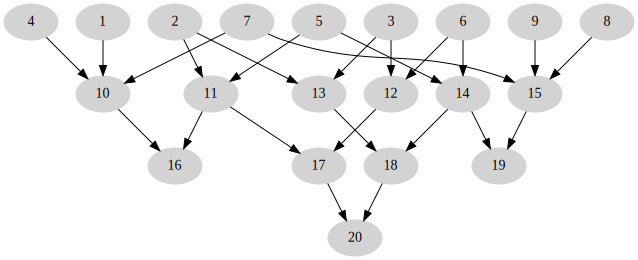

In [198]:
importlib.reload(lb)
importlib.reload(ag)
age = ag.AbstractAgent(env)
env.shut_down()
age.env.show()

In [199]:
age.C

{1, 2, 3, 4, 5, 6, 7, 8, 9}

In [200]:
age.start()

5.0%
10.0%
15.0%
20.0%
25.0%
30.0%
35.0%
40.0%
45.0%
50.0%
60.0%
65.0%
70.0%
75.0%
80.0%
85.0%
90.0%
95.0%
100.0%


In [205]:
for i in range(1,21):
    print(age.FMDP[i]["parents"])

{1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: []}
{1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: []}
{1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: []}
{1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: []}
{1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: []}
{1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: []}
{1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 

In [71]:
age.FMDP[11]["cpts"][11].print_tree()
print(age.FMDP[14]["cpts"][14].children[0].children[1].entropy())
age.FMDP[14]["cpts"][14].children[0].children[1].distrib_vect




11      
├── -0-> 0
└── -1-> 0


IndexError: tuple index out of range

In [64]:
for i_dbn in [14]:#range(1,21):
    print("-------DBN {} --------".format(i_dbn))
    for i_cpt in age.FMDP[i_dbn]["cpts"]:
        print("---CPT {}---".format(i_cpt))
        age.FMDP[i_dbn]["cpts"][i_cpt].print_tree()

-------DBN 14 --------
---CPT 1---
1       
├── -0-> 0.0
└── -1-> 0.315
---CPT 2---
2       
├── -0-> 0.0
└── -1-> 0.21000000000000002
---CPT 3---
3       
├── -0-> 0.0
└── -1-> 0.2631578947368421
---CPT 4---
4       
├── -0-> 0.0
└── -1-> 0.21733023166447082
---CPT 5---
5       
├── -0-> 0.0
└── -1-> 6
    ├── -0-> 0.10500000000000001
    └── -1-> 1.0
---CPT 6---
6       
├── -0-> 0.0
└── -1-> 0.29411764705882354
---CPT 7---
7       
├── -0-> 0.0
└── -1-> 0.21000000000000002
---CPT 8---
8       
├── -0-> 0.0
└── -1-> 0.2631578947368421
---CPT 9---
9       
├── -0-> 0.0
└── -1-> 0.19049586776859506
---CPT 10---
10      
├── -0-> 0.0
└── -1-> 0.0
---CPT 11---
11      
├── -0-> 0.0
└── -1-> 0.0
---CPT 12---
12      
├── -0-> 0.0
└── -1-> 0.0
---CPT 13---
13      
├── -0-> 0.0
└── -1-> 0
---CPT 14---
14      
├── -0-> 6
│   ├── -0-> 0.0
│   └── -1-> 0.29411764705882354
└── -1-> 0.0
---CPT 15---
15      
├── -0-> 0.0
└── -1-> 0
---CPT 16---
16      
├── -0-> 0.0
└── -1-> 0
---CPT 17---
17 

In [21]:
for o in age.options:
    age.options[o].print_tree()
    age.options[o].opt_root.parent.print_tree()
    print(age.options[o].opt_root.used)
    print("-----------------------")

O11 -> On
5       
├── A5 [0]
└── A11 [1]
11      
├── -0-> 5
│   ├── -0-> 0.0
│   └── -1-> 0.5384615384615384
└── -1-> 0.0
True
-----------------------
O2 -> Off
6       
├── A2 [0]
└── A6 [1]
2       
├── -0-> 0.0
└── -1-> 6
    ├── -0-> 0.0
    └── -1-> 0.7777777777777778
True
-----------------------
O4 -> Off
3       
├── A4 [0]
└── A3 [1]
4       
├── -0-> 0.0
└── -1-> 3
    ├── -0-> 0.06666666666666667
    └── -1-> 1.0
True
-----------------------
O14 -> On
6       
├── A6 [0]
└── A14 [1]
14      
├── -0-> 6
│   ├── -0-> 0.0
│   └── -1-> 0.4666666666666667
└── -1-> 0.0
True
-----------------------
O12 -> On
6       
├── A6 [0]
└── 3 [1]
    ├── A3 [0]
    └── A12 [1]
12      
├── -0-> 6
│   ├── -0-> 0.0
│   └── -1-> 3
│       ├── -0-> 0.0
│       └── -1-> 1.0
└── -1-> 0.0
True
-----------------------
O5 -> Off
9       
├── A5 [0]
└── A9 [1]
5       
├── -0-> 0.0
└── -1-> 9
    ├── -0-> 0.0
    └── -1-> 0.625
True
-----------------------
O6 -> Off
3       
├── A6 [0]
└── A3 [1]
6 

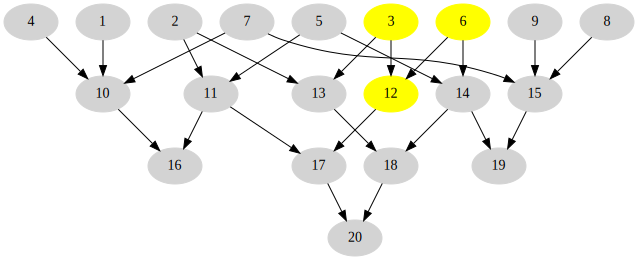

In [252]:
o = age.options[(12,1)]
env.shut_down()
o.done=False
while(not o.done):
    o.next_step(env.get_state()).execute()
env.show()

In [216]:
from anytree import Node, RenderTree, AsciiStyle, LevelOrderIter
age.options_hierarchies
for o in age.options_hierarchies:
    print(hex(id(o)))
    o.print_tree()
    #for node in LevelOrderIter(o.root):
    #    print(node.solution)
    print(age.options_hierarchies[o])
    for n in age.options_hierarchies[o]:
        print(n)
        n.print_tree()
    print("-------------------------------------------")

0x7fc54500e630
O10 -> On
4       
├── A4 [0]
└── A10 [1]
set()
-------------------------------------------
0x7fc51dad5e80
O9 -> Off
5       
├── A9 [0]
└── A5 [1]
{<agents.AbstractAgent.Option object at 0x7fc51dad57b8>}
O8 -> Off
O8 -> Off
9       
├── A8 [0]
└── O9 -> Off [1]
-------------------------------------------
0x7fc51dad57b8
O8 -> Off
9       
├── A8 [0]
└── O9 -> Off [1]
set()
-------------------------------------------


In [15]:
age.remove(10, 1)
age.C

KeyError: (10, 1)

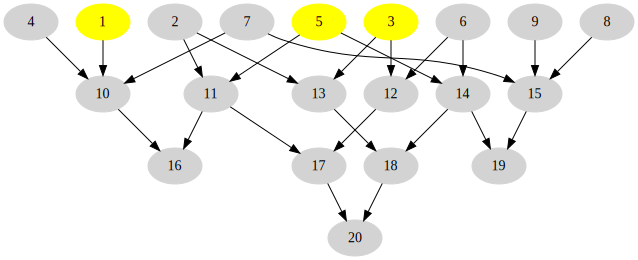

In [71]:
age.env.show()

### Random agent

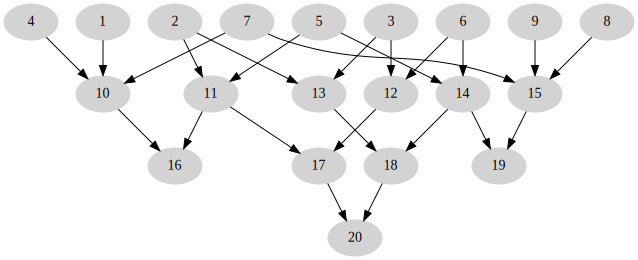

In [55]:
importlib.reload(lb)
importlib.reload(ag)
importlib.reload(rand_ag)
randAg = rand_ag.RandomAgent(env)
env.shut_down()
randAg.env.show() 

In [56]:
randAg.start()

2.0% - 0 correct refinements
4.0% - 1 correct refinements
6.0% - 3 correct refinements
8.0% - 3 correct refinements
10.0% - 3 correct refinements
12.0% - 3 correct refinements
16.0% - 4 correct refinements
18.0% - 6 correct refinements
20.0% - 8 correct refinements
22.0% - 8 correct refinements
24.0% - 10 correct refinements
26.0% - 10 correct refinements
30.0% - 11 correct refinements
32.0% - 11 correct refinements
34.0% - 11 correct refinements
36.0% - 11 correct refinements
38.0% - 11 correct refinements
40.0% - 10 correct refinements
42.0% - 10 correct refinements
44.0% - 11 correct refinements
46.0% - 11 correct refinements
48.0% - 14 correct refinements
50.0% - 14 correct refinements
52.0% - 14 correct refinements
54.0% - 14 correct refinements
60.0% - 14 correct refinements
62.0% - 14 correct refinements
64.0% - 14 correct refinements
66.0% - 14 correct refinements
68.0% - 14 correct refinements
70.0% - 14 correct refinements
72.0% - 14 correct refinements
74.0% - 14 correct ref

In [57]:
randAg.refin

{(1, 2),
 (1, 6),
 (1, 8),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 6),
 (3, 8),
 (3, 9),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 1),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 2),
 (6, 5),
 (6, 7),
 (6, 8),
 (7, 1),
 (7, 2),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 8),
 (8, 1),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (9, 1),
 (9, 3),
 (9, 4),
 (9, 6),
 (9, 7),
 (10, 1),
 (10, 4),
 (10, 7),
 (10, 9),
 (10, 13),
 (11, 2),
 (11, 5),
 (11, 6),
 (11, 13),
 (12, 3),
 (12, 6),
 (13, 2),
 (13, 3),
 (13, 7),
 (14, 2),
 (14, 3),
 (14, 5),
 (14, 6),
 (14, 7),
 (15, 7),
 (15, 8),
 (15, 9),
 (15, 11)}

In [58]:
randAg.count_correct_refinements()

14

In [59]:
randAg.options

{(11, 1): <agents.AbstractAgent.Option at 0x7fa93467f550>,
 (12, 1): <agents.AbstractAgent.Option at 0x7fa962b6d438>,
 (13, 1): <agents.AbstractAgent.Option at 0x7fa9345aed30>,
 (14, 1): <agents.AbstractAgent.Option at 0x7fa945da9438>,
 (10, 1): <agents.AbstractAgent.Option at 0x7fa932b668d0>,
 (15, 1): <agents.AbstractAgent.Option at 0x7fa932afb518>,
 (5, 0): <agents.AbstractAgent.Option at 0x7fa9638443c8>,
 (3, 0): <agents.AbstractAgent.Option at 0x7fa932ba8198>,
 (6, 0): <agents.AbstractAgent.Option at 0x7fa963844a90>,
 (4, 0): <agents.AbstractAgent.Option at 0x7fa963c17160>}

### Local agent

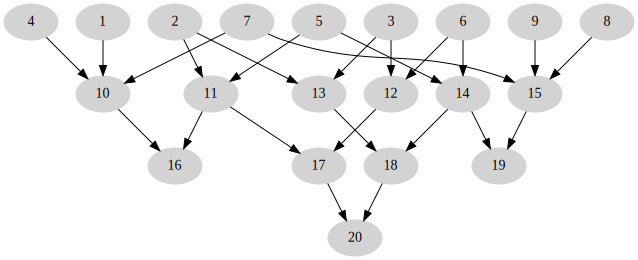

In [239]:
importlib.reload(lb)
importlib.reload(ag)
importlib.reload(loc_ag)
locAg = loc_ag.LocalAgent(env)
env.shut_down()
locAg.env.show() 

In [240]:
locAg.start()

/home/antonin/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2614: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)


Selected act :	 A20 	 	 	 G : nan 	 	 	 State : [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Selected act :	 A7 	 	 	 G : nan 	 	 	 State : [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Selected act :	 A4 	 	 	 G : nan 	 	 	 State : [False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False]
Selected act :	 A2 	 	 	 G : nan 	 	 	 State : [False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False]
Selected act :	 A19 	 	 	 G : nan 	 	 	 State : [False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False]
Selected act :	 A16 	 	 	 G : nan 	 	 	 State : [False, False, Fa

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
print(locAg.t)
cpts = locAg.FMDP[1]["cpts"]
tot = 0
for tree in cpts:
    cpts[tree].print_tree()
    print(cpts[tree].children[0].distrib_vect)
    print(cpts[tree].children[1].distrib_vect)
    tmp = cpts[tree].tree_entropy_gain([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    print(tmp)
    tot += tmp
    print( " ")
print(tot)

In [ ]:
locAg.refin

In [9]:
locAg.options

{}

# Simple env

In [31]:
light_by_lvl = [4,4,2,1]
dependencies = [[],[],[],[],
                [1,3],[2,4],[1,2],[3,4],
                [5,6],[7,8],
                [9,10]]
simple_env = lb.LightBox(light_by_lvl=light_by_lvl, dependencies=dependencies)

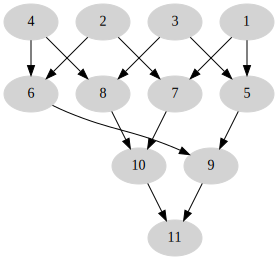

In [32]:
simple_env.show()

In [7]:
simple_env.count_refin()

[{'id': 1, 'level': 1, 'dependencies': [], 'state': False}, {'id': 2, 'level': 1, 'dependencies': [], 'state': False}, {'id': 3, 'level': 1, 'dependencies': [], 'state': False}, {'id': 4, 'level': 1, 'dependencies': [], 'state': False}, {'id': 5, 'level': 2, 'dependencies': [1, 3], 'state': False}, {'id': 6, 'level': 2, 'dependencies': [2, 4], 'state': False}, {'id': 7, 'level': 2, 'dependencies': [1, 2], 'state': False}, {'id': 8, 'level': 2, 'dependencies': [3, 4], 'state': False}, {'id': 9, 'level': 3, 'dependencies': [5, 6], 'state': False}, {'id': 10, 'level': 3, 'dependencies': [7, 8], 'state': False}, {'id': 11, 'level': 4, 'dependencies': [9, 10], 'state': False}]
{'id': 1, 'level': 1, 'dependencies': [], 'state': False}
[]
{'id': 2, 'level': 1, 'dependencies': [], 'state': False}
[]
{'id': 3, 'level': 1, 'dependencies': [], 'state': False}
[]
{'id': 4, 'level': 1, 'dependencies': [], 'state': False}
[]
{'id': 5, 'level': 2, 'dependencies': [1, 3], 'state': False}
[1, 3]
{'id':

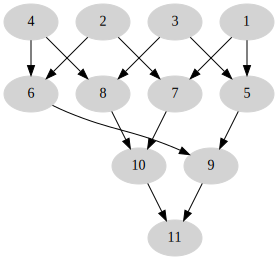

In [221]:
importlib.reload(lb)
importlib.reload(ag)
importlib.reload(rand_ag)
randAg = rand_ag.RandomAgent(simple_env)
simple_env.shut_down()
randAg.env.show() 

In [222]:
randAg.start()

2.0% - 4 correct refinements 	 
Running for 0.0 hours, 0.0 minutes, 0.9630787372589111 seconds
4.0% - 7 correct refinements 	 
Running for 0.0 hours, 0.0 minutes, 3.9823427200317383 seconds
6.0% - 8 correct refinements 	 
Running for 0.0 hours, 0.0 minutes, 8.57309365272522 seconds
8.0% - 8 correct refinements 	 
Running for 0.0 hours, 0.0 minutes, 14.874835014343262 seconds
10.0% - 9 correct refinements 	 
Running for 0.0 hours, 0.0 minutes, 22.8707172870636 seconds
12.0% - 9 correct refinements 	 
Running for 0.0 hours, 0.0 minutes, 32.479159116744995 seconds
16.0% - 9 correct refinements 	 
Running for 0.0 hours, 0.0 minutes, 57.06821632385254 seconds
18.0% - 9 correct refinements 	 
Running for 0.0 hours, 1.0 minutes, 12.53352952003479 seconds
20.0% - 9 correct refinements 	 
Running for 0.0 hours, 1.0 minutes, 29.45564341545105 seconds
22.0% - 9 correct refinements 	 
Running for 0.0 hours, 1.0 minutes, 48.42360019683838 seconds
24.0% - 9 correct refinements 	 
Running for 0.0 hou

KeyboardInterrupt: 

In [20]:
randAg.options[(5,1)].print_tree()

O5 -> On
3       
├── A3 [0]
└── 1 [1]
    ├── A1 [0]
    └── A5 [1]


In [21]:
randAg.C

{1, 2, 3, 4, 5, 6, 8}

In [77]:
for v in randAg.C : 
    print(v)

1
2
3
4
5
6
8


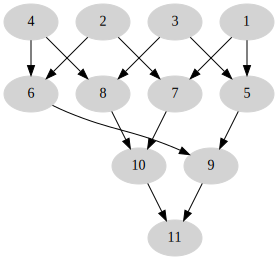

In [8]:
importlib.reload(lb)
importlib.reload(ag)
importlib.reload(loc_ag)
locAg = loc_ag.LocalAgent(simple_env)
simple_env.shut_down()
locAg.env.show() 

In [9]:
locAg.start()

/home/antonin/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2614: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)


2.0% - 5 correct refinements 	 
Running for 0.0 hours, 0.0 minutes, 12.96637773513794 seconds
4.0% - 6 correct refinements 	 
Running for 0.0 hours, 0.0 minutes, 28.164348602294922 seconds
6.0% - 7 correct refinements 	 
Running for 0.0 hours, 0.0 minutes, 45.05511951446533 seconds
8.0% - 8 correct refinements 	 
Running for 0.0 hours, 1.0 minutes, 2.872122049331665 seconds


KeyboardInterrupt: 

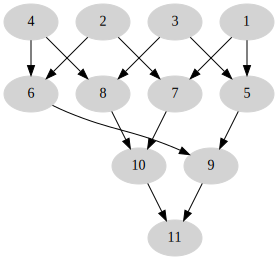

In [26]:
importlib.reload(lb)
importlib.reload(ag)
importlib.reload(glob_ag)
globAg = glob_ag.GlobalAgent(simple_env)
simple_env.shut_down()
globAg.env.show() 

In [15]:
print(globAg.selectAction(globAg.env.get_state()))
print(globAg.plan_ptr)

A1
1


In [16]:
for s in globAg.current_plan:
    print(s)

A1
A2
A3
O6 -> On
A9


In [14]:
plan = globAg.compute_plan(globAg.env.get_state())
for p in plan:
    print(p)

A1
A2
A3
O6 -> On
A9


In [ ]:
globAg.start()

/home/antonin/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2614: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)


Create: 
O1 -> On
4       
├── A4 [0]
└── A1 [1]
1       
├── -0-> 4
│   ├── -0-> 0.9411764705882353
│   └── -1-> 1.0
└── -1-> 0.14285714285714285
remove : 
O1 -> On
4       
├── A4 [0]
└── A1 [1]
Create: 
O3 -> On
2       
├── A2 [0]
└── A3 [1]
3       
├── -0-> 2
│   ├── -0-> 0.9
│   └── -1-> 0.9
└── -1-> 0.25
remove : 
O3 -> On
2       
├── A2 [0]
└── A3 [1]
Create: 
O3 -> On
2       
├── A2 [0]
└── A3 [1]
3       
├── -0-> 2
│   ├── -0-> 0.9090909090909091
│   └── -1-> 0.9
└── -1-> 0.25
remove : 
O3 -> On
2       
├── A2 [0]
└── A3 [1]
Create: 
O1 -> On
4       
├── A4 [0]
└── A1 [1]
1       
├── -0-> 4
│   ├── -0-> 0.9444444444444444
│   └── -1-> 1.0
└── -1-> 0.125
remove : 
O1 -> On
4       
├── A4 [0]
└── A1 [1]
Create: 
O2 -> On
1       
├── A1 [0]
└── A2 [1]
2       
├── -0-> 1
│   ├── -0-> 0.8888888888888888
│   └── -1-> 0.9090909090909091
└── -1-> 0.2
remove : 
O2 -> On
1       
├── A1 [0]
└── A2 [1]
Create: 
O1 -> On
4       
├── A4 [0]
└── A1 [1]
1       
├── -0-> 4
│   ├─

In [26]:
globAg.print_entropies = not globAg.print_entropies 

In [28]:
globAg.options

{(3, 0): <agents.AbstractAgent.Option at 0x7f3cdbc3da90>,
 (4, 0): <agents.AbstractAgent.Option at 0x7f3cda9ca9b0>,
 (6, 0): <agents.AbstractAgent.Option at 0x7f3cace08d30>,
 (2, 0): <agents.AbstractAgent.Option at 0x7f3cdbda22b0>,
 (9, 0): <agents.AbstractAgent.Option at 0x7f3cff04ee10>,
 (7, 0): <agents.AbstractAgent.Option at 0x7f3cdbcb4400>,
 (1, 0): <agents.AbstractAgent.Option at 0x7f3cdbceaeb8>,
 (5, 0): <agents.AbstractAgent.Option at 0x7f3cdbc2d668>,
 (8, 0): <agents.AbstractAgent.Option at 0x7f3cda9ca0b8>,
 (5, 1): <agents.AbstractAgent.Option at 0x7f3cdbea42e8>,
 (6, 1): <agents.AbstractAgent.Option at 0x7f3cdb64cc18>,
 (7, 1): <agents.AbstractAgent.Option at 0x7f3cdb7d49e8>,
 (8, 1): <agents.AbstractAgent.Option at 0x7f3cdaf0cf28>,
 (10, 1): <agents.AbstractAgent.Option at 0x7f3cdb7d5630>,
 (10, 0): <agents.AbstractAgent.Option at 0x7f3cdbea4208>}

In [30]:
globAg.options[(10,1)].print_tree()

O10 -> On
8       
├── O8 -> On [0]
└── 7 [1]
    ├── O7 -> On [0]
    └── A10 [1]


In [29]:
globAg.C

{1, 2, 3, 4, 5, 6, 7, 8, 10}

In [33]:
globAg.t

4362

In [71]:
globAg.count_correct_refinements()

9

In [32]:
globAg.refin

{(1, 2),
 (1, 3),
 (2, 1),
 (2, 3),
 (3, 1),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 7),
 (6, 8),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (9, 5),
 (9, 6),
 (10, 6),
 (11, 9),
 (11, 10)}

In [34]:
for r in globAg.env.refin:
    if r in globAg.refin:
        print(r)

(6, 4)
(8, 3)
(11, 10)
(7, 1)
(11, 9)
(9, 5)
(6, 2)
(8, 4)
(5, 1)
(9, 6)
(7, 2)
(5, 3)


In [22]:
for i_dbn in [9]:#range(1,21):
    print("-------DBN {} --------".format(i_dbn))
    for i_cpt in globAg.FMDP[i_dbn]["cpts"]:
        print("---CPT {}---".format(i_cpt))
        globAg.FMDP[i_dbn]["cpts"][i_cpt].print_tree()

-------DBN 9 --------
---CPT 1---
1       
├── -0-> 0.0
└── -1-> 0.3333574832172658
---CPT 2---
2       
├── -0-> 0.0
└── -1-> 0.40869565217391307
---CPT 3---
3       
├── -0-> 0.0
└── -1-> 0.28001803918860774
---CPT 4---
4       
├── -0-> 0.0
└── -1-> 0.318211687493351
---CPT 5---
5       
├── -0-> 0.0
└── -1-> 0.4666666666666667
---CPT 6---
6       
├── -0-> 0.0
└── -1-> 0.6153846153846154
---CPT 7---
7       
├── -0-> 0.0
└── -1-> 0.3125
---CPT 8---
8       
├── -0-> 0.0
└── -1-> 0.46153846153846156
---CPT 9---
9       
├── -0-> 0.0976810095173463
└── -1-> 0.0
---CPT 10---
10      
├── -0-> 0.0
└── -1-> 0.25
---CPT 11---
11      
├── -0-> 0.0
└── -1-> 0


In [9]:
a=0
for idbn in globAg.FMDP:
    a+=1
    tot = 0
    for icpt in globAg.FMDP[idbn]["cpts"]:
        totcpt = 0
        for node in globAg.FMDP[idbn]["cpts"][icpt].descendants:
            if not node.dataset == None:
                tot+=len(node.dataset)
                totcpt+=len(node.dataset)
        print("DBN {}, cpt{} : {} points".format(a, icpt,totcpt))
    print("DBN {} : {} points".format(a, tot))

DBN 1, cpt1 : 42 points
DBN 1, cpt2 : 42 points
DBN 1, cpt3 : 42 points
DBN 1, cpt4 : 42 points
DBN 1, cpt5 : 42 points
DBN 1, cpt6 : 42 points
DBN 1, cpt7 : 42 points
DBN 1, cpt8 : 42 points
DBN 1, cpt9 : 42 points
DBN 1, cpt10 : 42 points
DBN 1, cpt11 : 42 points
DBN 1 : 462 points
DBN 2, cpt1 : 37 points
DBN 2, cpt2 : 37 points
DBN 2, cpt3 : 37 points
DBN 2, cpt4 : 37 points
DBN 2, cpt5 : 37 points
DBN 2, cpt6 : 37 points
DBN 2, cpt7 : 37 points
DBN 2, cpt8 : 37 points
DBN 2, cpt9 : 37 points
DBN 2, cpt10 : 37 points
DBN 2, cpt11 : 37 points
DBN 2 : 407 points
DBN 3, cpt1 : 40 points
DBN 3, cpt2 : 40 points
DBN 3, cpt3 : 40 points
DBN 3, cpt4 : 40 points
DBN 3, cpt5 : 40 points
DBN 3, cpt6 : 40 points
DBN 3, cpt7 : 40 points
DBN 3, cpt8 : 40 points
DBN 3, cpt9 : 40 points
DBN 3, cpt10 : 40 points
DBN 3, cpt11 : 40 points
DBN 3 : 440 points
DBN 4, cpt1 : 33 points
DBN 4, cpt2 : 33 points
DBN 4, cpt3 : 33 points
DBN 4, cpt4 : 33 points
DBN 4, cpt5 : 33 points
DBN 4, cpt6 : 33 points
D

In [10]:
(a,s)=globAg.best_state_action(simple_env.get_state())

print(a)
print(s)

[False, True, False, False, False, False, True, False, False, False, False]
A6
